# SARIMA(p,d,q)(P,D,Q)m
# Seasonal Autoregressive Integrated Moving Averages

Where ARIMA accepts the parameters $(p,d,q)$, SARIMA accepts an <em>additional</em> set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. Here $P$, $D$ and $Q$ represent the seasonal regression, differencing and moving average coefficients, and $m$ represents the number of data points (rows) in each seasonal cycle.

<strong>NOTE:</strong> The statsmodels implementation of SARIMA is called SARIMAX. The “X” added to the name means that the function also supports <em>exogenous</em> regressor variables. We'll cover these in the next section.


<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html'>sarimax.SARIMAX</a></strong><font color=black>(endog[, exog, order, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html'>sarimax.SARIMAXResults</a></strong><font color=black>(model, params, …[, …])</font>&nbsp;&nbsp;Class to hold results from fitting a SARIMAX model.</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://www.statsmodels.org/stable/statespace.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis by State Space Methods</font></div>

In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('co2_mm_mlo.csv')

In [2]:
df

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
724,2018,7,2018.542,408.71,408.71
725,2018,8,2018.625,406.99,406.99
726,2018,9,2018.708,405.51,405.51
727,2018,10,2018.792,406.00,406.00


In [3]:
df['date'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [6]:
df = df.set_index('date')

In [7]:
df

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
2018-07-01,2018,7,2018.542,408.71,408.71
2018-08-01,2018,8,2018.625,406.99,406.99
2018-09-01,2018,9,2018.708,405.51,405.51


In [8]:
df.index.freq = 'MS'

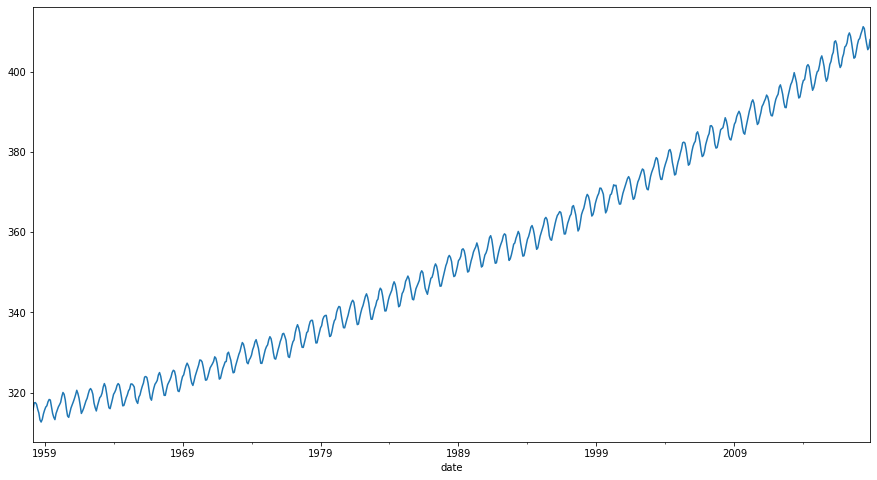

In [10]:
df['interpolated'].plot(figsize=(15,8));

### Run an ETS Decomposition

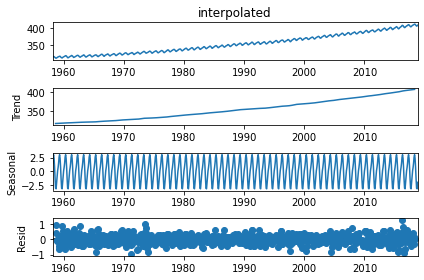

In [11]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

Although small in scale compared to the overall values, there is a definite annual seasonality.

### Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot more combinations to evaluate.

In [13]:
# For SARIMA Orders we set seasonal=True and pass in an m value

auto_arima(df['interpolated'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.254
Date:                            Fri, 04 Mar 2022   AIC                            424.509
Time:                                    11:44:51   BIC                            452.051
Sample:                                         0   HQIC                           435.136
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3537      0.081      4.378      0.000       0.195       0.512
ar.L2          0.0898      0.024      3.697      0.000       0.042       0.137
ma.L1         -0.7096      0.071     -9.931      0.000      -0.850      -0.570
ar.S.L12       0.9996      0.000   2967.764      0.000       0.999       1.000
ma.S.L12      -0.8667      0.021    -40.689      0.000      -0.908      -0.825
sigma2         0.0957      0.005     20.461      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.45
Prob(Q):                              0.81   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Split the data into train/test sets

In [14]:
len(df)

729

In [15]:
train = df.iloc[:717]
test = df.iloc[717:]

In [16]:
model = SARIMAX(train['interpolated'], order = (2,1,1), seasonal_order = (1,0,1,12))

In [17]:
results = model.fit()

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.888
Date:                            Fri, 04 Mar 2022   AIC                            415.776
Time:                                    11:45:23   BIC                            443.218
Sample:                                03-01-1958   HQIC                           426.373
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3503      0.055      6.317      0.000       0.242       0.459
ar.L2          0.0847      0.024      3.549      0.000       0.038       0.131
ma.L1         -0.7044      0.048    -14.589      0.000      -0.799      -0.610
ar.S.L12       0.9996      0.000   2793.955      0.000       0.999       1.000
ma.S.L12      -0.8648      0.023    -37.688      0.000      -0.910      -0.820
sigma2         0.0953      0.005     20.258      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.63
Prob(Q):                              0.80   Prob(JB):                         0.10
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
start = len(train)
end = len(train) + len(test) - 1

In [22]:
preds = results.predict(start, end, typ='levels').rename('SARIMA Predictions')

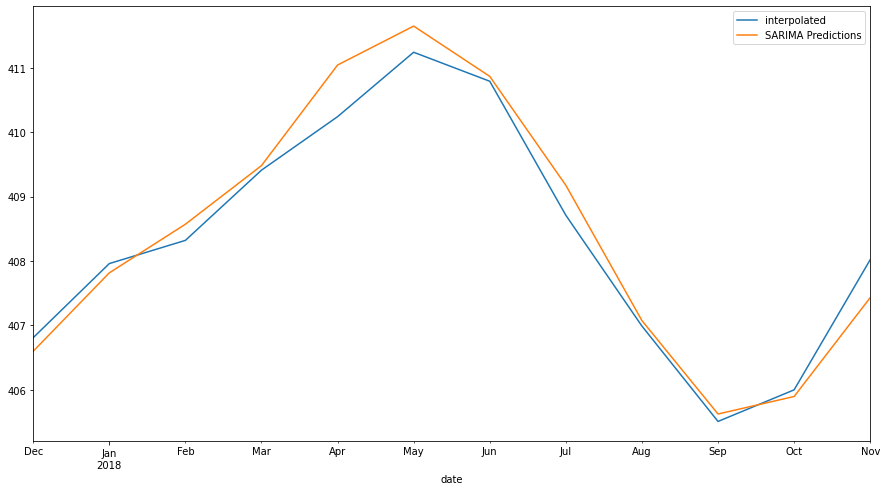

In [24]:
test['interpolated'].plot(legend=True, figsize=(15,8))
preds.plot(legend=True);

### Evaluate the Model

In [25]:
from statsmodels.tools.eval_measures import rmse

In [26]:
error = rmse(test['interpolated'], preds)

In [27]:
error

0.3582348619644179

In [28]:
test['interpolated'].mean()

408.3333333333333

These are outstanding results!
### Retrain the model on the full data, and forecast the future

In [29]:
model = SARIMAX(df['interpolated'], order = (2,1,1), seasonal_order = (1,0,1,12))
results = model.fit()

In [30]:
forecast = results.predict(len(df), len(df)+11, typ='levels').rename('SARIMA Forecast')

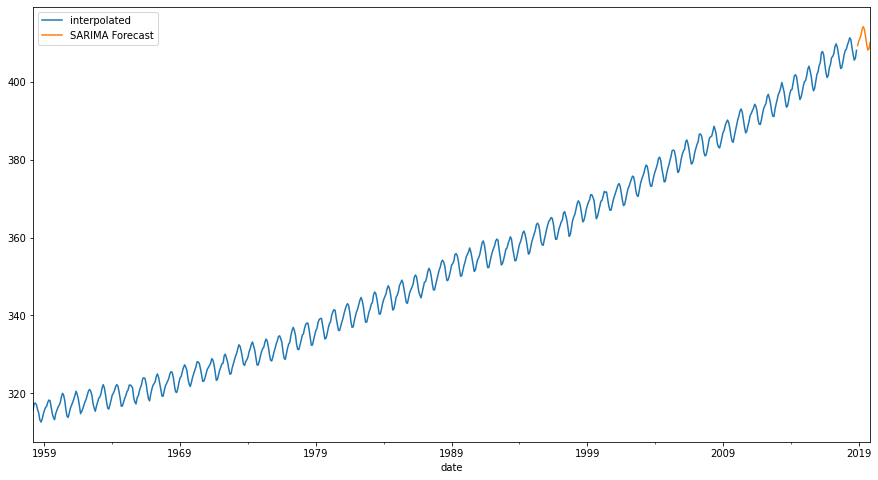

In [31]:
df['interpolated'].plot(legend = True, figsize = (15,8))
forecast.plot(legend=True);